In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

df_krange = pd.read_csv('k_range_data.csv', parse_dates=['timestamp'])
df_krange['ex_meter_time'] = df_krange.control + df_krange.ta + df_krange['agg']
print(df_krange.count())
# df_krange = df_krange[df_krange['host'] == 'BruceChen']

func             131934
control          131934
ta               131934
agg              131934
meter_num        131934
meter_time       131934
name             131934
host             131934
timestamp        131934
ex_meter_time    131934
dtype: int64


# 本文方法分析


In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.formatter.use_mathtext"] = True
markers = ['o', 'v', 's', 'd', 'X']
color = ['b', 'y', 'g', 'r']

In [3]:
df_k_extend = pd.read_csv('k_extend_data.csv', parse_dates=['timestamp'])

df_k_extend['ex_meter_time'] = df_k_extend.control + df_k_extend.ta + df_k_extend['agg']
df_k_extend.head()
df = pd.concat([df_krange, df_k_extend])
# df = df_k_extend
avg_col = {'control':np.mean, 'ta':np.mean, 'agg':np.mean, 'meter_time':np.mean, 'ex_meter_time':np.mean}
avg_df_midx = df.groupby(['host', 'name', 'func', 'meter_num']).agg(avg_col)
display(avg_df_midx.style)
avg_df_midx.rename(index={'cir':'our'})

control         ta  \
host        name func            meter_num                            
BruceChen   our  meterRegTime_10 20         1.550715e+04   80964.40   
                 meterRegTime_11 20         1.525665e+04  100623.80   
                 meterRegTime_12 20         1.521765e+04   93975.55   
                 meterRegTime_13 20         1.542330e+04  115775.90   
                 meterRegTime_14 20         1.430490e+04  104161.30   
...                                                  ...        ...   
raspberrypi our  meterRepTime_r5 20         2.414811e+07       0.00   
                 meterRepTime_r6 20         2.426709e+07       0.00   
                 meterRepTime_r7 20         2.431216e+07       0.00   
                 meterRepTime_r8 20         2.422937e+07       0.00   
                 meterRepTime_r9 20         2.419328e+07       0.00   

                                                     agg    meter_time  \
host        name func            meter_num                               
BruceChen   our  meterRegTime_10 20         0.000000e+00  2.708143e+08   
                 meterRegTime_11 20         0.000000e+00  2.703025e+08   
                 meterRegTime_12 20         0.000000e+00  2.687571e+08   
                 meterRegTime_13 20         0.000000e+00  2.705094e+08   
                 meterRegTime_14 20         0.000000e+00  2.713552e+08   
...                                                  ...           ...   
raspberrypi our  meterRepTime_r5 20         3.656034e+06  3.215576e+08   
                 meterRepTime_r6 20         3.898871e+06  3.226834e+08   
                 meterRepTime_r7 20         4.141078e+06  3.239606e+08   
                 meterRepTime_r8 20         4.089431e+06  3.216310e+08   
                 meterRepTime_r9 20         3.897329e+06  3.217315e+08   

                                            ex_meter_time  
host        name func            meter_num                 
BruceChen   our  meterRegTime_10 20          9.647155e+04  
                 meterRegTime_11 20          1.158804e+05  
                 meterRegTime_12 20          1.091932e+05  
                 meterRegTime_13 20          1.311992e+05  
                 meterRegTime_14 20          1.184662e+05  
...                                                   ...  
raspberrypi our  meterRepTime_r5 20          2.780414e+07  
                 meterRepTime_r6 20          2.816597e+07  
                 meterRepTime_r7 20          2.845324e+07  
                 meterRepTime_r8 20          2.831881e+07  
                 meterRepTime_r9 20          2.809061e+07  

[95 rows x 5 columns]

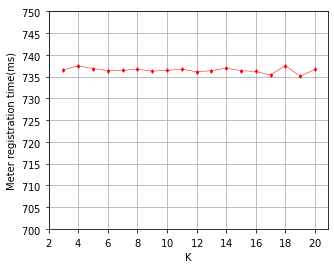

In [4]:
# k anonymous register meter
kMax = 21
kMin = 3
k = [k for k in range(kMin,kMax)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Meter registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(700, 755, 5))
plt.xticks(range(kMin-1,kMax+1, 2))
plt.savefig('figs/meter_k_meter_register.svg')
plt.show()

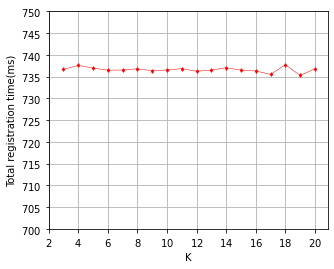

In [5]:
# 注册阶段 总时间
# k anonymous register total

k = [k for k in range(kMin, kMax)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = []
for fname in k_anony_f:
     rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', fname, m_num), 'meter_time']
     host_time = avg_df_midx.loc[('BruceChen', 'cir', fname, m_num), 'ex_meter_time']
     y_time = (rasp_time + host_time) / 1e6
     k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='r')
plt.xlabel('K')
plt.ylabel('Total registration time(ms)')
plt.yticks(range(700, 755, 5))
plt.xticks(range(kMin-1, kMax+1, 2))
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.savefig('figs/total_k_total_reg.svg')

plt.show()

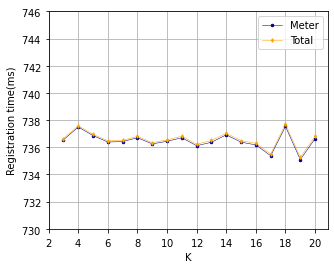

In [6]:
# k anonymous register meter
kMax = 21
kMin = 3
k = [k for k in range(kMin,kMax)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[0],  color='navy', label='Meter')

k = [k for k in range(kMin, kMax)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = []
for fname in k_anony_f:
     rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', fname, m_num), 'meter_time']
     host_time = avg_df_midx.loc[('BruceChen', 'cir', fname, m_num), 'ex_meter_time']
     y_time = (rasp_time + host_time) / 1e6
     k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='orange', label='Total')

plt.xlabel('k')
plt.ylabel('Registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(730, 747, 2))
plt.xticks(range(kMin-1,kMax+1, 2))
plt.legend()
plt.savefig('figs/k_register.svg')
plt.show()